# Deep Learning with PyTorch

In [17]:
# imports
import torch
import numpy
import cv2

In [18]:
# Check whether CUDA is available
if torch.cuda.is_available():
    print("CUDA Available")
else:
    print("CUDA Unavailable")

CUDA Available


## 2.1 张量基础

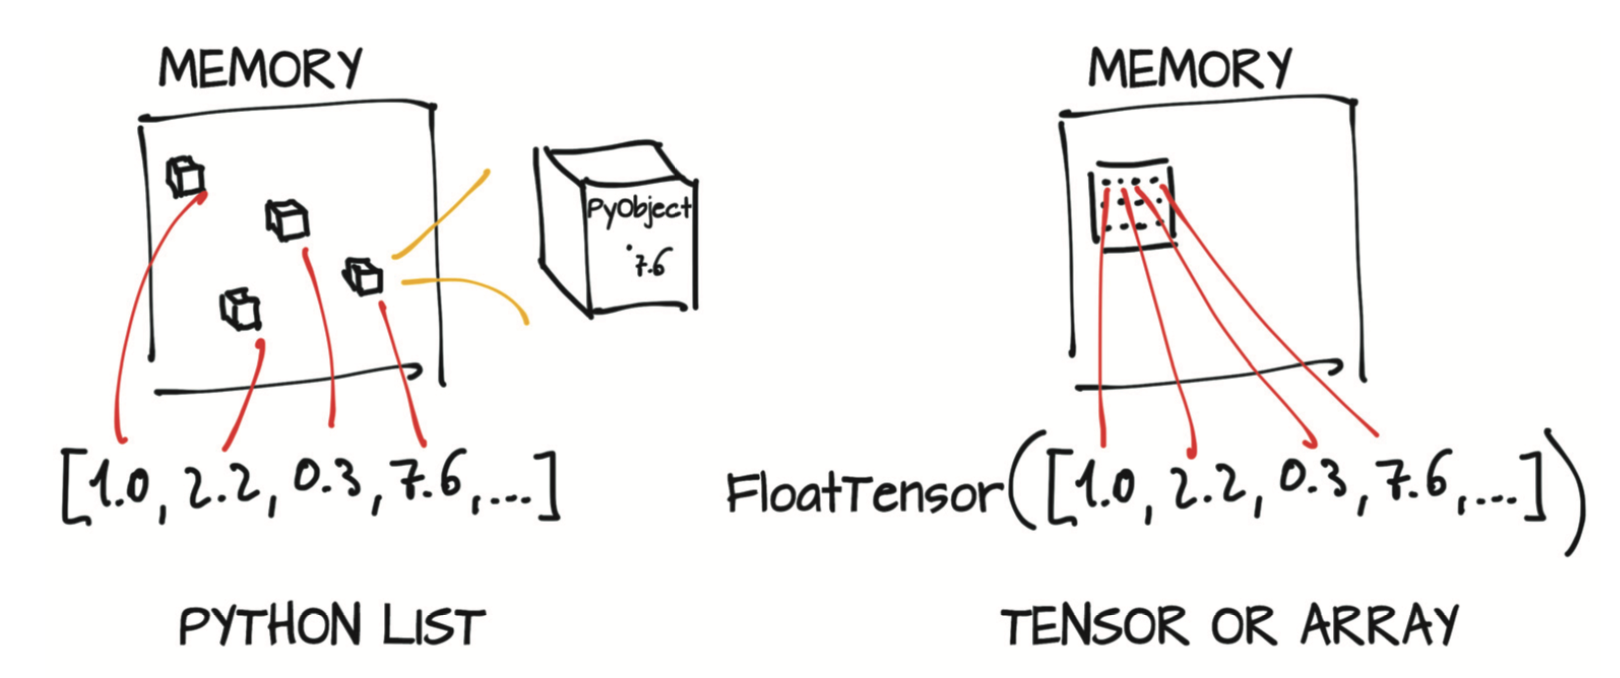

In [19]:
# Tensor Tests
tensor_a = torch.ones(3)
print(tensor_a) # tensor([1., 1., 1.])
print(tensor_a[1]) # tensor(1.)
print(float(tensor_a[1])) # 1.0
# Modify the tensor
tensor_a[2] = 2.0
print(tensor_a) # tensor([1., 1., 2.])
# Initialize the tensor as zeros
tensor_b = torch.zeros(6)
print(tensor_b) # tensor([0., 0., 0., 0., 0., 0.])
# Initialize the tensor with py list
tensor_c = torch.tensor([1.0, 4.0, 2.0, 1.0])
print(tensor_c) # tensor([1., 4., 2., 1.])
print(tensor_c.shape)
# Two-Dimensional Tensors
tensor_d = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
print(tensor_d)
print(tensor_d.shape)
print(tensor_d[0][1])
print(tensor_d[0, 1])
print(tensor_d[0])
tensor_e = torch.zeros(3, 3)
print(tensor_e)

tensor([1., 1., 1.])
tensor(1.)
1.0
tensor([1., 1., 2.])
tensor([0., 0., 0., 0., 0., 0.])
tensor([1., 4., 2., 1.])
torch.Size([4])
tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])
torch.Size([3, 2])
tensor(4.)
tensor(4.)
tensor([1., 4.])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


## 2.2 张量与储存

在本节中，我们将开始了解关于内部实现的信息。数值分配在连续的内存块中，由`torch.Storage`实例管理。存储（`Storage`）是一个一维的数值数据数组，例如一块包含了指定类型（可能是float或int32）数字的连续内存块。PyTorch的张量（`Tensor`）就是这种存储（`Storage`）的视图（view），我们可以使用偏移量和每一维的跨度索引到该存储中。

多个张量可以索引同一存储，即使它们的索引方式可能不同，如图2.4所示。 实际上，当你在上节最后一个代码片段中获取`points[0]`时，你得到的是另一个张量，该张量与`points`索引相同的存储，只是不是索引该存储的全部并且具有不同的维数（一维与二维）。由于基础内存仅分配一次，所以无论`Storage`实例管理的数据大小如何，都可以快速地在该数据上创建不同的张量视图。
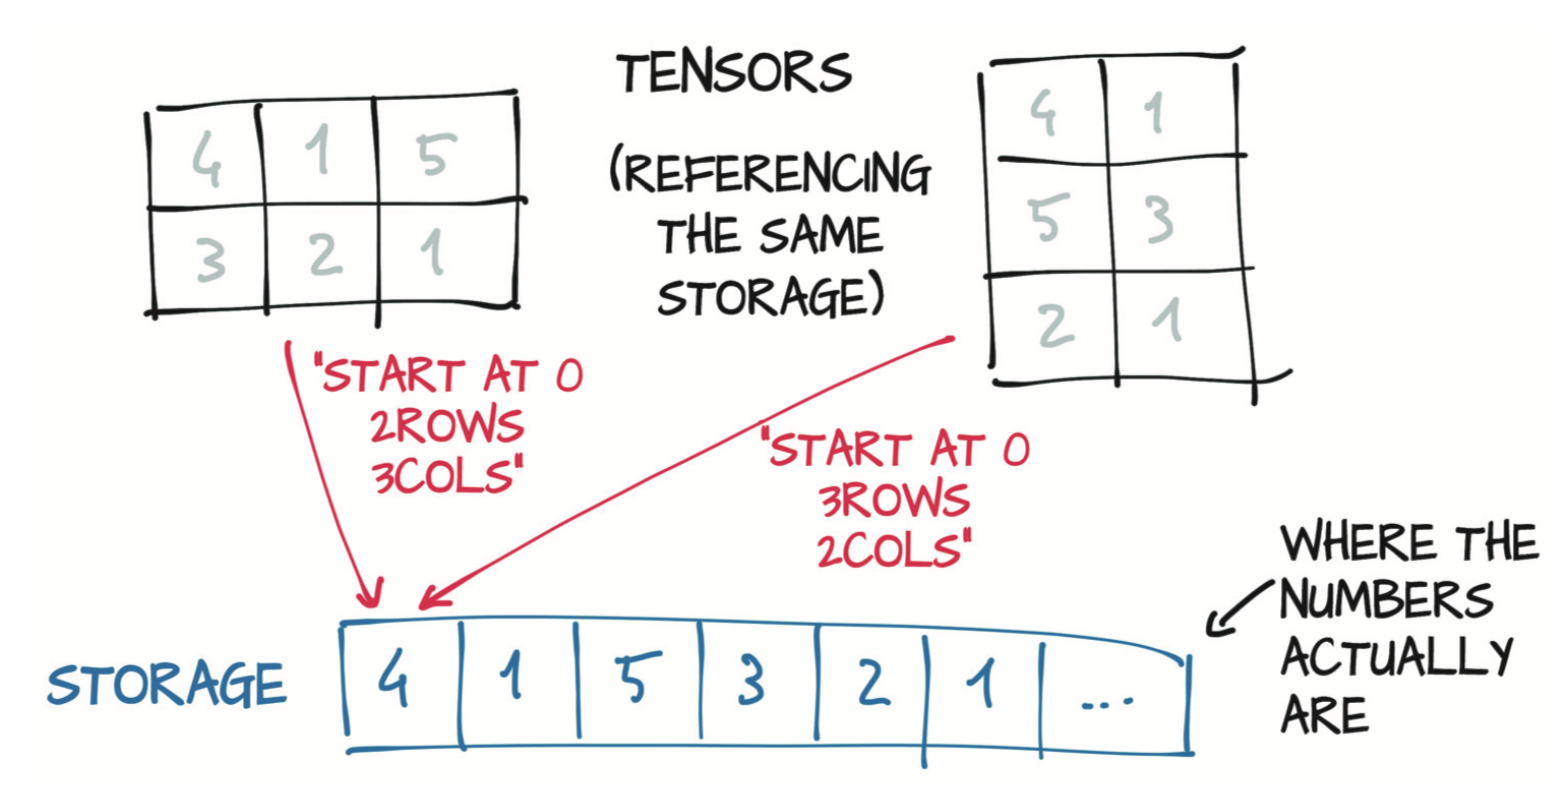

In [20]:
# Tensor Storage Tests
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
points_storage = points.storage()
print(points_storage)
print(points_storage[0], points_storage[3])
# Modify the value in storage will also result in the change of tensor value
points_storage[0] = 2.0
print(points)

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]
1.0 1.0
tensor([[2., 4.],
        [2., 1.],
        [3., 5.]])


## 2.3 Offset, Size & Stride

除了存放存储外，为了索引存储，张量依赖于几条明确定义它们的信息：尺寸（size）、存储偏移（storage offset）和步长（stride），如图2.5所示。尺寸（或按照NumPy中的说法：形状shape）是一个元组，表示张量每个维度上有多少个元素。存储偏移是存储中与张量中的第一个元素相对应的索引。步长是在存储中为了沿每个维度获取下一个元素而需要跳过的元素数量。
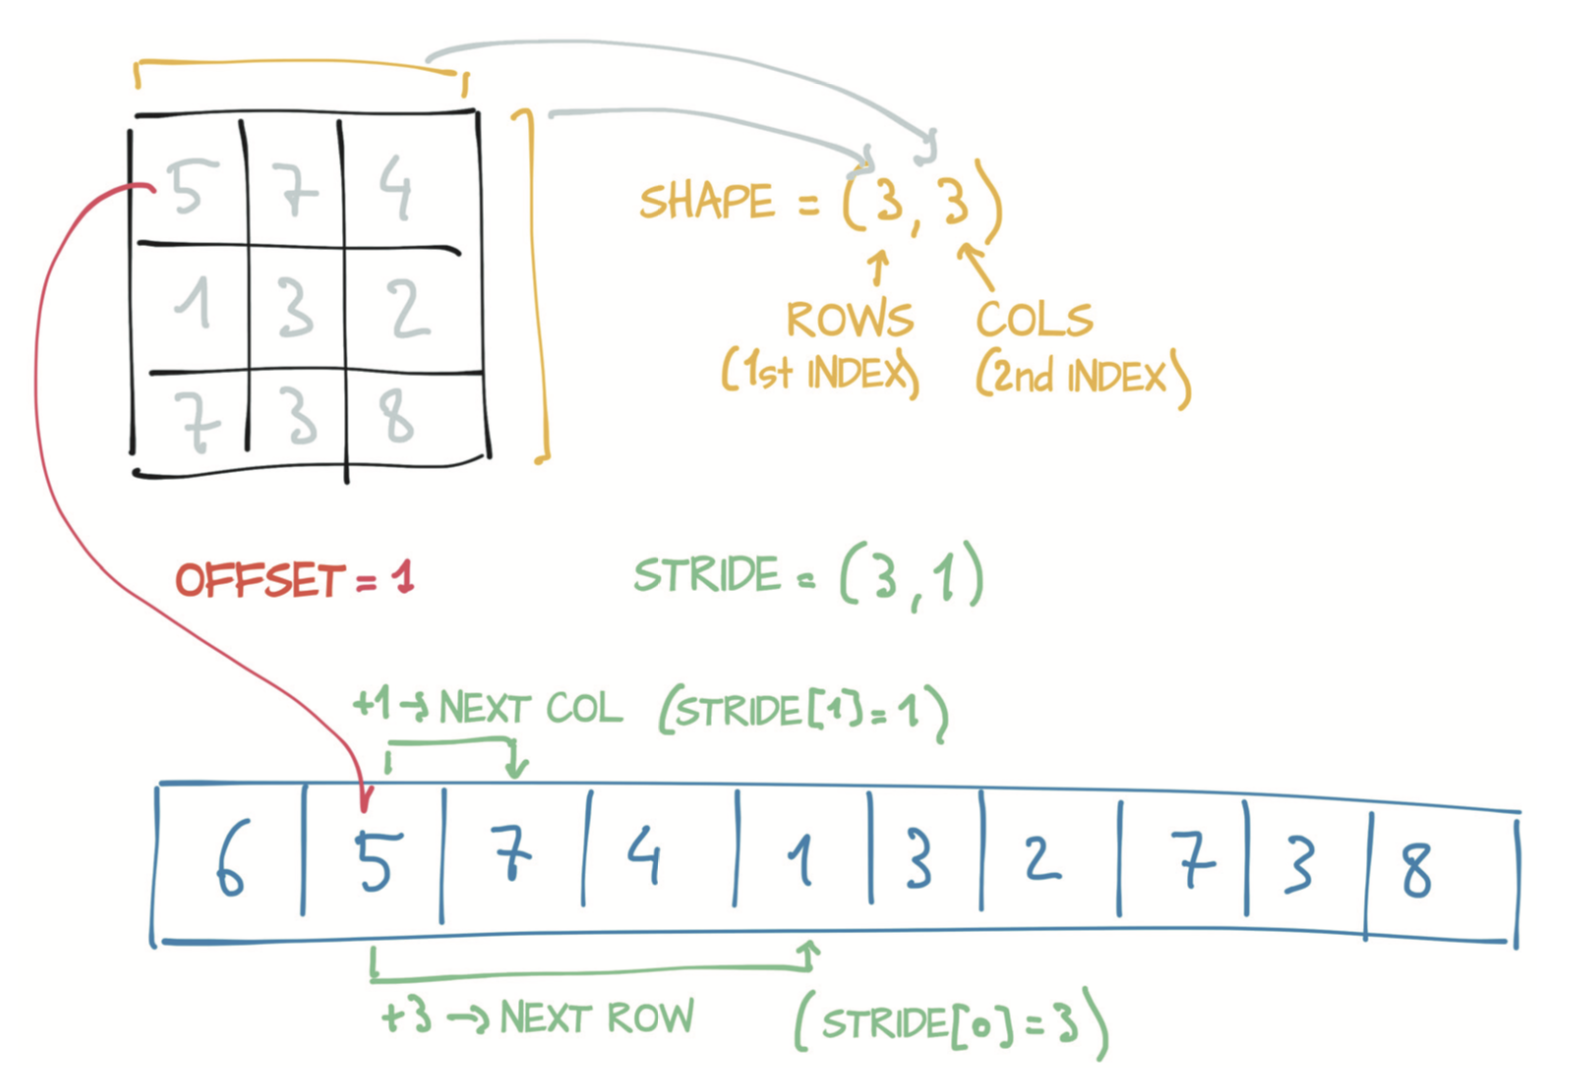

In [21]:
# Offset
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
second_point = points[1]
print(second_point.storage_offset())
second_element = points[0][1]
print(second_element.storage_offset())

2
1


In [22]:
# Size
print(points.size())

torch.Size([3, 2])


In [23]:
# Stride
print(points.stride())
points = torch.zeros(5, 5, 5)
print(points)
print(points.stride())
points = torch.ones(4, 3, 2, 2)
print(points)
print(points.stride())

(2, 1)
tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
(25, 5, 1)
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
       

In [24]:
# Sub-tensor's size, offset & stride
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
second_point = points[1]

print(second_point.size())
print(second_point.storage_offset())
print(second_point.stride())

torch.Size([2])
2
(1,)


In [25]:
# Modify the Sub-tensor will also result in the change of the mother tensor
second_point[0] = 10.0
print(points)
"""
If we don't want these things to happen, 
in another word, we want them to be different objects, 
which have completely different address in RAM, 
we have to clone the tensor as the following codes demonstrate:
"""
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
second_point = points[1].clone()
second_point[0] = 10.0
print(points)

tensor([[ 1.,  4.],
        [10.,  1.],
        [ 3.,  5.]])
tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])


In [26]:
# Now, we may introduce the transpose of tensors
# Similar to matrix.T in numpy
points_t = points.t()
print("Transpose Matrix:")
print(points_t)
# They share the same storage in RAM:
if id(points.storage()) == id(points_t.storage()):
    print("Identical Storage")
else: print("Not Identical Storage")
    
print(points.stride())
print(points_t.stride())

Transpose Matrix:
tensor([[1., 2., 3.],
        [4., 1., 5.]])
Identical Storage
(2, 1)
(1, 2)


在PyTorch中进行转置不仅限于矩阵（即二维数组）。以翻转三维数组的步长和尺寸为例，你可以通过指定应需要转置的两个维度来转置多维数组：

In [27]:
some_tensor = torch.ones(3, 4, 5)
some_tensor, some_tensor.shape, some_tensor.stride()

(tensor([[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],
 
         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],
 
         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]),
 torch.Size([3, 4, 5]),
 (20, 5, 1))

In [28]:
some_tensor_t = some_tensor.transpose(0, 2)
some_tensor_t, some_tensor_t.shape, some_tensor_t.stride()

(tensor([[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]),
 torch.Size([5, 4, 3]),
 (1, 5, 20))

从最右边的维开始将其值存放在存储中的张量（例如沿着行存放在存储中的二维张量）定义为连续（Contiguous）张量。连续张量很方便，因为你可以高效且有序地访问它们的元素而不是在存储中四处跳跃访问。（由于现代CPU中内存访问的工作原理，改善数据局部性可提高性能。译者注：即连续张量满足局部性原理）

在前例中，`points`是连续的，但其转置不是：

In [29]:
points.is_contiguous(), points_t.is_contiguous(), points_t.storage()

(True,
 False,
  1.0
  4.0
  2.0
  1.0
  3.0
  5.0
 [torch.FloatStorage of size 6])

我们可以讲转置的不连续的tensor变成连续的

In [30]:
points_t = points.t()
points_t_cont = points_t.contiguous()
points_t.is_contiguous(), points_t_cont.is_contiguous()

(False, True)

In [31]:
points_t.stride(), points_t_cont.stride()

((1, 2), (3, 1))

In [32]:
points_t_cont.storage()

 1.0
 2.0
 3.0
 4.0
 1.0
 5.0
[torch.FloatStorage of size 6]

## 2.4 数据类型

数据类型指定张量可以容纳的可能值（整数还是浮点数）以及每个值的字节数。`dtype`参数被故意设计成类似于同名的标准NumPy参数。以下是`dtype`参数的可能取值的列表：

* `torch.float32`或`torch.float` —— 32位浮点数
* `torch.float64`或`torch.double` —— 64位双精度浮点数 
* `torch.float16`或`torch.half` —— 16位半精度浮点数
* `torch.int8` —— 带符号8位整数
* `torch.uint8` —— 无符号8位整数
* `torch.int16`或`torch.short` —— 带符号16位整数
* `torch.int32`或`torch.int` —— 带符号32位整数
* `torch.int64`或`torch.long` —— 带符号64位整数

每个`torch.float`、`torch.double`等等都有一个与之对应的具体类：`torch.FloatTensor`、`torch.DoubleTensor`等等。`torch.int8`对应的类是`torch.CharTensor`，而`torch.uint8`对应的类是`torch.ByteTensor`。`torch.Tensor`是`torch.FloatTensor`的别名，即默认数据类型为32位浮点型。

想要分配正确数字类型的张量，你可以指定合适的`dtype`作为张量构造函数的参数，如下所示：

In [33]:
double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)
short_points.dtype

torch.int16

In [34]:
# Convert to double / short
double_points = torch.zeros(10, 2).double()
short_points = torch.ones(10, 2).short()
double_points = torch.zeros(10, 2).to(torch.double)
short_points = torch.ones(10, 2).to(dtype=torch.short)

在实现内部，type和to执行相同的操作，即“检查类型如果需要就转换（check-and-convert-if-needed）”，但是to方法可以使用其他参数。

你始终可以使用type方法将一种类型的张量转换为另一种类型的张量：

In [35]:
points = torch.randn(5, 2)
print(points)
short_points = points.type(torch.short)
print(short_points)

tensor([[-0.0562,  0.2848],
        [-0.3797, -1.2072],
        [ 0.2858,  0.9030],
        [-0.9309,  2.0581],
        [-1.7072,  1.0196]])
tensor([[ 0,  0],
        [ 0, -1],
        [ 0,  0],
        [ 0,  2],
        [-1,  1]], dtype=torch.int16)


## 2.5 索引张量

In [36]:
points[1:]    # 第1行及之后所有行，（默认）所有列

tensor([[-0.3797, -1.2072],
        [ 0.2858,  0.9030],
        [-0.9309,  2.0581],
        [-1.7072,  1.0196]])

In [37]:
points[1:, :] # 第1行及之后所有行，所有列

tensor([[-0.3797, -1.2072],
        [ 0.2858,  0.9030],
        [-0.9309,  2.0581],
        [-1.7072,  1.0196]])

In [38]:
points[1:, 0] # 第1行及之后所有行，仅第0列

tensor([-0.3797,  0.2858, -0.9309, -1.7072])

## 2.6 与NumPy的互通性

In [39]:
# tensor 与 numpy
points = torch.ones(3, 4)
points_np = points.numpy()
points_np

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

它返回尺寸、形状和数值类型正确的NumPy多维数组。有趣的是，返回的数组与张量存储共享一个基础缓冲区。因此，只要数据位于CPU RAM中，numpy方法就可以几乎零花费地高效执行，并且修改得到的NumPy数组会导致原始张量发生变化。

如果在GPU上分配了张量，（调用numpy方法时）PyTorch会将张量的内容复制到在CPU上分配的NumPy数组中。

相反，你可以通过以下方式从NumPy数组创建PyTorch张量：

In [40]:
points = torch.from_numpy(points_np)
points

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

## 2.7 序列化张量

In [41]:
# 储存tensor
print(points)
torch.save(points, './data/chapter2/outpoints.t')
# Equivalent to the following codes:
with open('./data/chapter2/outpoints.t', 'wb') as f:
    torch.save(points, f)
f.close()

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [42]:
# 读取tensor
points = torch.load('./data/chapter2/outpoints.t')
print(points)
# Equivalent to the following codes:
with open('./data/chapter2/outpoints.t', 'rb') as f:
    points = torch.load(f)
    print(points)
f.close()

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


如果只想通过PyTorch加载张量，则上述例子可让你快速保存张量，但这个文件格式本身是不互通（interoperable）的，你无法使用除PyTorch外其他软件读取它。根据实际使用情况，上述情况可能问题不大，但应该学习一下如何在有的时候（即想用其他软件读取的时候）互通地保存张量。尽管实际情况都是独一无二的，但当你想将PyTorch引入已经依赖于不同库的现有系统中时，上述情况会很常见；而全新的项目可能不需要经常互通地保存张量。

对于需要（互通）的情况，你可以使用HDF5格式和库。HDF5是一种可移植的、广泛支持的格式，用于表示以嵌套键值字典形式组织的序列化多维数组。Python通过h5py库支持HDF5，该库以NumPy数组的形式接收和返回数据。

In [43]:
import h5py

f = h5py.File('./data/chapter2/ourpoints.hdf5', 'w')
dset = f.create_dataset('coords', data=points.numpy())
print(dset)
f.close()

<HDF5 dataset "coords": shape (3, 4), type "<f4">


In [44]:
f = h5py.File('./data/chapter2/ourpoints.hdf5', 'r')
dset = f['coords']
last_points = dset[1:]
print(dset)
print(last_points)
last_points = torch.from_numpy(dset[1:])
print(last_points)
last_points = torch.tensor(dset[1:])
print(last_points)
f.close()

<HDF5 dataset "coords": shape (3, 4), type "<f4">
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])


## 2.8 将张量转移到GPU上运行

PyTorch张量的最后一点是关于在GPU上计算。每一个Torch张量都可以转移到GPU上去执行快速、大规模并且可以并行的计算。在张量上执行的所有操作均由PyTorch自带的GPU特定例程执行。

> 请注意： 截止至2019年初，主要的PyTorch版本仅仅在支持CUDA的GPU上具有加速功能。PyTorch的概念验证版本（Proof-of-concept version）已经可以运行在AMD的ROCm平台上，但是从1.0版开始，尚未将全部支持合并到PyTorch中。对Google TPU的支持正在进行开发中，目前的概念验证版已在Google Colab中向公众公开。在我们写这章的时候，并未计划在其他GPU技术（例如OpenCL）上实现相应的数据结构和内核。

除了dtype之外，PyTorch张量还具有设备（device）的概念，这是在设置计算机上放张量（tensor）数据的位置。 通过为构造函数指定相应的参数，可以在GPU上创建张量：

In [45]:
points_gpu = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 4.0]], device='cuda')
print(points_gpu)

tensor([[1., 4.],
        [2., 1.],
        [3., 4.]], device='cuda:0')


这段代码返回一个具有相同数值数据的新张量，但存储在GPU的RAM中，而不是常规的系统RAM中。

现在数据已经存放在本地的GPU中，当在张量上运行数字运算时，你可以看见很好的加速效果。并且，这个新GPU支持的张量的类也更改为torch.cuda.FloatTensor（一开始输入的类型为torch.FloatTensor；torch.cuda.DoubleTensor等等也存在对应关系）。在大部分样例中，基于CPU和GPU的张量都公开面向用户相同的API，这使得与繁琐数字运算过程中无关的代码的编写更加容易。

如果你的机器拥有多个GPU，你可以通过传递从零开始的整数来确定张量分配给哪个GPU，该整数标志着机器上的GPU下标：

In [46]:
points_gpu = points.to(device='cuda:0')
print(points_gpu)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0')


In [47]:
points = 2 * points # 在CPU上做乘法
points_gpu = 2 * points.to(device='cuda') # 在GPU上做乘法

请注意，当计算结果产生后，points_gpu的张量并不会返回到CPU。这里发生的是以下三个过程：

将points张量复制到GPU
在GPU上分配了一个新的张量，并用于存储乘法的结果
返回该GPU张量的句柄
因此，如果你还想向结果加上一个常量：

In [48]:
points_gpu = points_gpu + 4

加法仍然在GPU上执行，并且没有信息流到CPU（除非您打印或访问得到的张量）。 如果要将张量移回CPU，你需要为to方法提供一个cpu参数：

In [49]:
points_cpu = points_gpu.to(device='cpu')

你可以使用速记方法`cpu`和`cuda`代替`to`方法来实现相同的目标

In [50]:
points_gpu = points.cuda() # 默认为GPU0
points_gpu = points.cuda(0)
points_cpu = points_gpu.cpu()

值得一提的是，使用`to`方法时，可以通过提供`device`和`dtype`参数来同时更改位置和数据类型。

## 2.9 Tensor's API
本节，你将知道PyTorch张量是什么以及在内部它们如何运行。在结束本章之前，我们还会看一下PyTorch提供的张量的操作。在这里列出所有操作没什么用，取而代之的是，我们将为你提供相关API的一般感觉并展示如何在官方文档中查找相关内容。

首先，在torch模块下可进行张量上和张量之间的绝大多数操作，这些操作也可以作为张量对象的方法进行调用。例如，你可以通过torch模块使用先前遇到的transpose函数：

In [51]:
a = torch.ones(3, 2)
a_t = torch.transpose(a, 0, 1)

或者调用a张量的方法：

In [52]:
a = torch.ones(3, 2)
a_t = a.transpose(0, 1)

以上两种形式之间没有区别，可以互换使用。需要注意的是：有少量的操作仅作为张量对象的方法存在。你可以通过名称中的下划线来识别它们，例如`zero_`，下划线标识表明该方法是就地（inplace）运行的，即直接修改输入而不是创建新的输出并返回。例如，`zero_`方法会将输入的所有元素清零。任何不带下划线的方法都将保持源张量不变并返回新的张量：

In [53]:
a = torch.ones(3, 2)
a.zero_()
a

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [54]:
a = torch.tensor(list(range(9)))
print(a)
b = a.view(3, 3)
print(b)
c = b[1:, 1:]
print(c)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[4, 5],
        [7, 8]])


## 3.1 表格数据

首先，我们假设样本在表格中的显示顺序是没有意义的。这与时间序列不同，这里的表是独立样本的集合，而在时间序列中，样本是在时间维度上相关的。

列可以包含数值型数据（例如特定位置的温度）或标签（例如表示样品属性的字符串，比如“蓝色”）。因此，表格数据通常不是同质的（homogeneous），不同的列有不同的类型。你可能有一列显示苹果的重量，另一列则用标签编码其颜色。

我们从有趣的东西开始：葡萄酒。葡萄酒质量数据集是可免费获得的表格数据，其中包含vinho verde（葡萄牙北部的葡萄酒）样品的化学表征以及感官质量评分。

针对此数据集可能的机器学习任务是通过化学表征来预测质量得分。不过，请放心，机器学习不会在短期内杀死葡萄酒品尝者，因为我们必须从某个地方获取训练数据！

如图3.1所示，你希望找到数据中的某一化学列与质量之间的关系。例如在此图中，你将看到质量随着硫含量减少而提高。

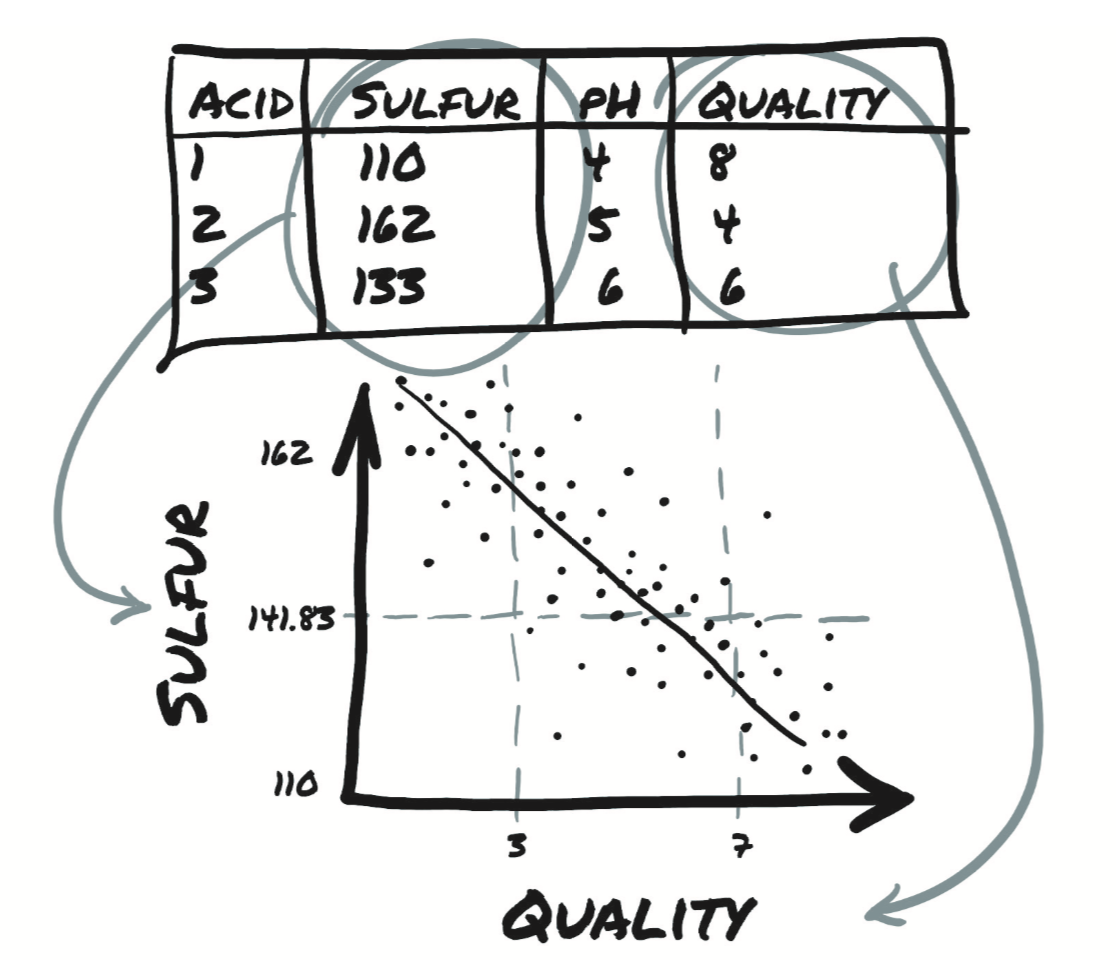


但是，在进行该观察之前，你需要一种比在文本编辑器中打开文件更有用的方式检查数据。我们将向您展示如何使用Python加载数据，然后将其转换为PyTorch张量。

Python提供了多个选项来快速加载CSV文件。三种常用的选择是

- Python自带的`csv`模块
- NumPy
- Pandas

第三个选项是最省时和最省内存的方法，但是我们将避免仅仅是加载文件就将的额外的库引入学习曲线。因为我们已经介绍了NumPy，并且PyTorch具有出色的NumPy互操作性，所以您将继续使用NumPy来加载文件并将生成的NumPy数组转换为PyTorch张量，如下面的代码所示。

In [55]:
import csv
import numpy as np
wine_path = "./data/chapter3/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
     skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

在这里，你指定了二维数组的类型（32位浮点数）和用于分隔每一行各值的分隔符，并指出不应读取第一行，因为它包含列名。接下来，检查是否已读取所有数据，

In [56]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

然后进一步将NumPy数组转成PyTorch张量：

In [57]:
import torch
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.type()

(torch.Size([4898, 12]), 'torch.FloatTensor')

你可以将（葡萄酒质量分数）分数视为连续变量，视为实数，然后进行回归任务；或者将其视为标签，作为分类任务尝试从化学分析猜出该标签。在这两种方法中，往往都将分数从输入数据的张量中删除，并将其保存在单独的张量中，以便将分数用作ground truth而不将其输入到模型中。

In [58]:
data = wineq[:, :-1] # 除最后一列外所有列
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [59]:
target = wineq[:, -1] # 最后一列
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

如果你想将target张量转换成标签张量，那么你有两个选择，具体取决于策略或使用分类数据的方式。第一种选择是将标签视为整数向量：

In [60]:
target = wineq[:, -1].long()
target

tensor([6, 6, 6,  ..., 6, 7, 6])

如果目标是字符串标签（例如颜色），则可以采用相同的方法为每个字符串分配一个整数。

另一种选择是构建独热（one-hot）编码，即将10个分数编码成10个向量，每个向量除了一个元素为1外其他所有元素都设置为0。此时，分数1可以映射到向量
$$(1,0,0,0,0,0,0,0,0,0)$$
，分数5映射到
$$(0,0,0,0,1,0,0,0,0,0)$$
，等等。分数值与非零元素的索引相对应的事实纯属偶然；你可以打乱上述分配，从分类的角度来看，什么都不会改变。

上述两种方法有明显的区别。将葡萄酒质量分数编码成分数的整数向量中会引入了分数的可排序性，在这个例子下可能是适当的，因为分数1低于分数4。这还会在分数之间产生一定的距离（例如1和3之间的距离与2和4之间的距离相同。）如果这符合你的定量关系，那就太好了。否则，如果分数纯粹是定性的（例如颜色），则独热编码更适合，因为它不涉及隐含的顺序或距离关系。当整数之间的分数值（例如2.4）对应用没有意义时（即要么是这个值要么是那个值），单热编码才适用。

您可以使用scatter_方法来实现独热编码，该方法将源张量中的值沿作为参数提供的索引进行填充。

In [61]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

现在看一下scatter_的作用。 首先请注意，其名称下划线结尾。PyTorch中，此约定表示该方法不会返回新的张量，而是就地修改源张量。 scatter_的参数是

指定后面两个参数所处理的维度
列张量，指示要填充的索引
包含填充元素的张量或者单个标量（上例中即1.0）
换句话说，前面的调用可以这样理解：“对于每一行，获取目标标签的索引（在本例中即葡萄酒质量分数），并将其用作列索引以设置值为1.0。结果就是得到了一个编码分类信息的张量。”

scatter_的第二个参数，即索引张量，必须具有与待填充张量相同的维数。由于target_onehot是二维（4898x10）的，因此你需要使用unsqueeze为target添加一个额外的维：

In [62]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed
# unsqueeze的参数代表维数的index（0开始），负的代表倒数

tensor([[6],
        [6],
        [6],
        ...,
        [6],
        [7],
        [6]])

PyTorch允许你在训练神经网络时直接将类别索引用作目标。但是，如果要用作网络的分类输入，则必须将其转换为独热编码张量。

现在回到data张量，其中包含与化学分析关联的11个变量。你可以使用PyTorch张量API中的函数以张量形式处理数据。首先，获取每列的均值和标准差：

In [63]:
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_mean, data_var

(tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
         1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01]),
 tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
         1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00]))

`dim=0`表示沿着维数`0`进行计算，同时我们可以使用这些数据来做归一化：

In [64]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7209e-01, -8.1764e-02,  2.1325e-01,  ..., -1.2468e+00,
         -3.4914e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7991e-02,  ...,  7.3992e-01,
          1.3467e-03, -8.2418e-01],
        [ 1.4756e+00,  1.7448e-02,  5.4378e-01,  ...,  4.7502e-01,
         -4.3677e-01, -3.3662e-01],
        ...,
        [-4.2042e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3131e+00,
         -2.6152e-01, -9.0544e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0048e+00,
         -9.6250e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7502e-01,
         -1.4882e+00,  1.0448e+00]])

接下来，我们来审查数据以寻找一种简单的方法来一眼分辨好酒和坏酒。首先，使用`torch.le`函数确定target中哪些行对应的分数小于或等于3：

In [65]:
bad_indexes = torch.le(target, 3)
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum(), bad_indexes

(torch.Size([4898]),
 torch.bool,
 tensor(20),
 tensor([False, False, False,  ..., False, False, False]))

注意，bad_indexes中只有20个元素为1！通过利用PyTorch中称为高级索引（advanced indexing）的功能，可以使用0/1张量来索引数据张量。此张量本质上将数据筛选为仅与索引张量中的1对应的元素（或行）。bad_indexes张量具有与target相同的形状，其值是0或1，具体取决于阈值与原始target张量中每个元素之间比较结果：

In [66]:
bad_data = data[bad_indexes]
bad_data.shape, bad_data

(torch.Size([20, 11]),
 tensor([[8.5000e+00, 2.6000e-01, 2.1000e-01, 1.6200e+01, 7.4000e-02, 4.1000e+01,
          1.9700e+02, 9.9800e-01, 3.0200e+00, 5.0000e-01, 9.8000e+00],
         [5.8000e+00, 2.4000e-01, 4.4000e-01, 3.5000e+00, 2.9000e-02, 5.0000e+00,
          1.0900e+02, 9.9130e-01, 3.5300e+00, 4.3000e-01, 1.1700e+01],
         [9.1000e+00, 5.9000e-01, 3.8000e-01, 1.6000e+00, 6.6000e-02, 3.4000e+01,
          1.8200e+02, 9.9680e-01, 3.2300e+00, 3.8000e-01, 8.5000e+00],
         [7.1000e+00, 3.2000e-01, 3.2000e-01, 1.1000e+01, 3.8000e-02, 1.6000e+01,
          6.6000e+01, 9.9370e-01, 3.2400e+00, 4.0000e-01, 1.1500e+01],
         [6.9000e+00, 3.9000e-01, 4.0000e-01, 4.6000e+00, 2.2000e-02, 5.0000e+00,
          1.9000e+01, 9.9150e-01, 3.3100e+00, 3.7000e-01, 1.2600e+01],
         [1.0300e+01, 1.7000e-01, 4.7000e-01, 1.4000e+00, 3.7000e-02, 5.0000e+00,
          3.3000e+01, 9.9390e-01, 2.8900e+00, 2.8000e-01, 9.6000e+00],
         [7.9000e+00, 6.4000e-01, 4.6000e-01, 1.0600e+01, 2

In [67]:
bad_data = data[torch.le(target, 3)]
# 对于numpy数组和PyTorch张量，＆运算符执行逻辑和运算
mid_data = data[torch.gt(target, 3) & torch.lt(target, 7)]
good_data = data[torch.ge(target, 7)]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:10.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity              7.60   6.89   6.73
 1 volatile acidity           0.33   0.28   0.27
 2 citric acid                0.34   0.34   0.33
 3 residual sugar             6.39   6.71   5.26
 4 chlorides                  0.05   0.05   0.04
 5 free sulfur dioxide       53.33  35.42  34.55
 6 total sulfur dioxide     170.60 141.83 125.25
 7 density                    0.99   0.99   0.99
 8 pH                         3.19   3.18   3.22
 9 sulphates                  0.47   0.49   0.50
10 alcohol                   10.34  10.26  11.42


## 3.2 时间序列

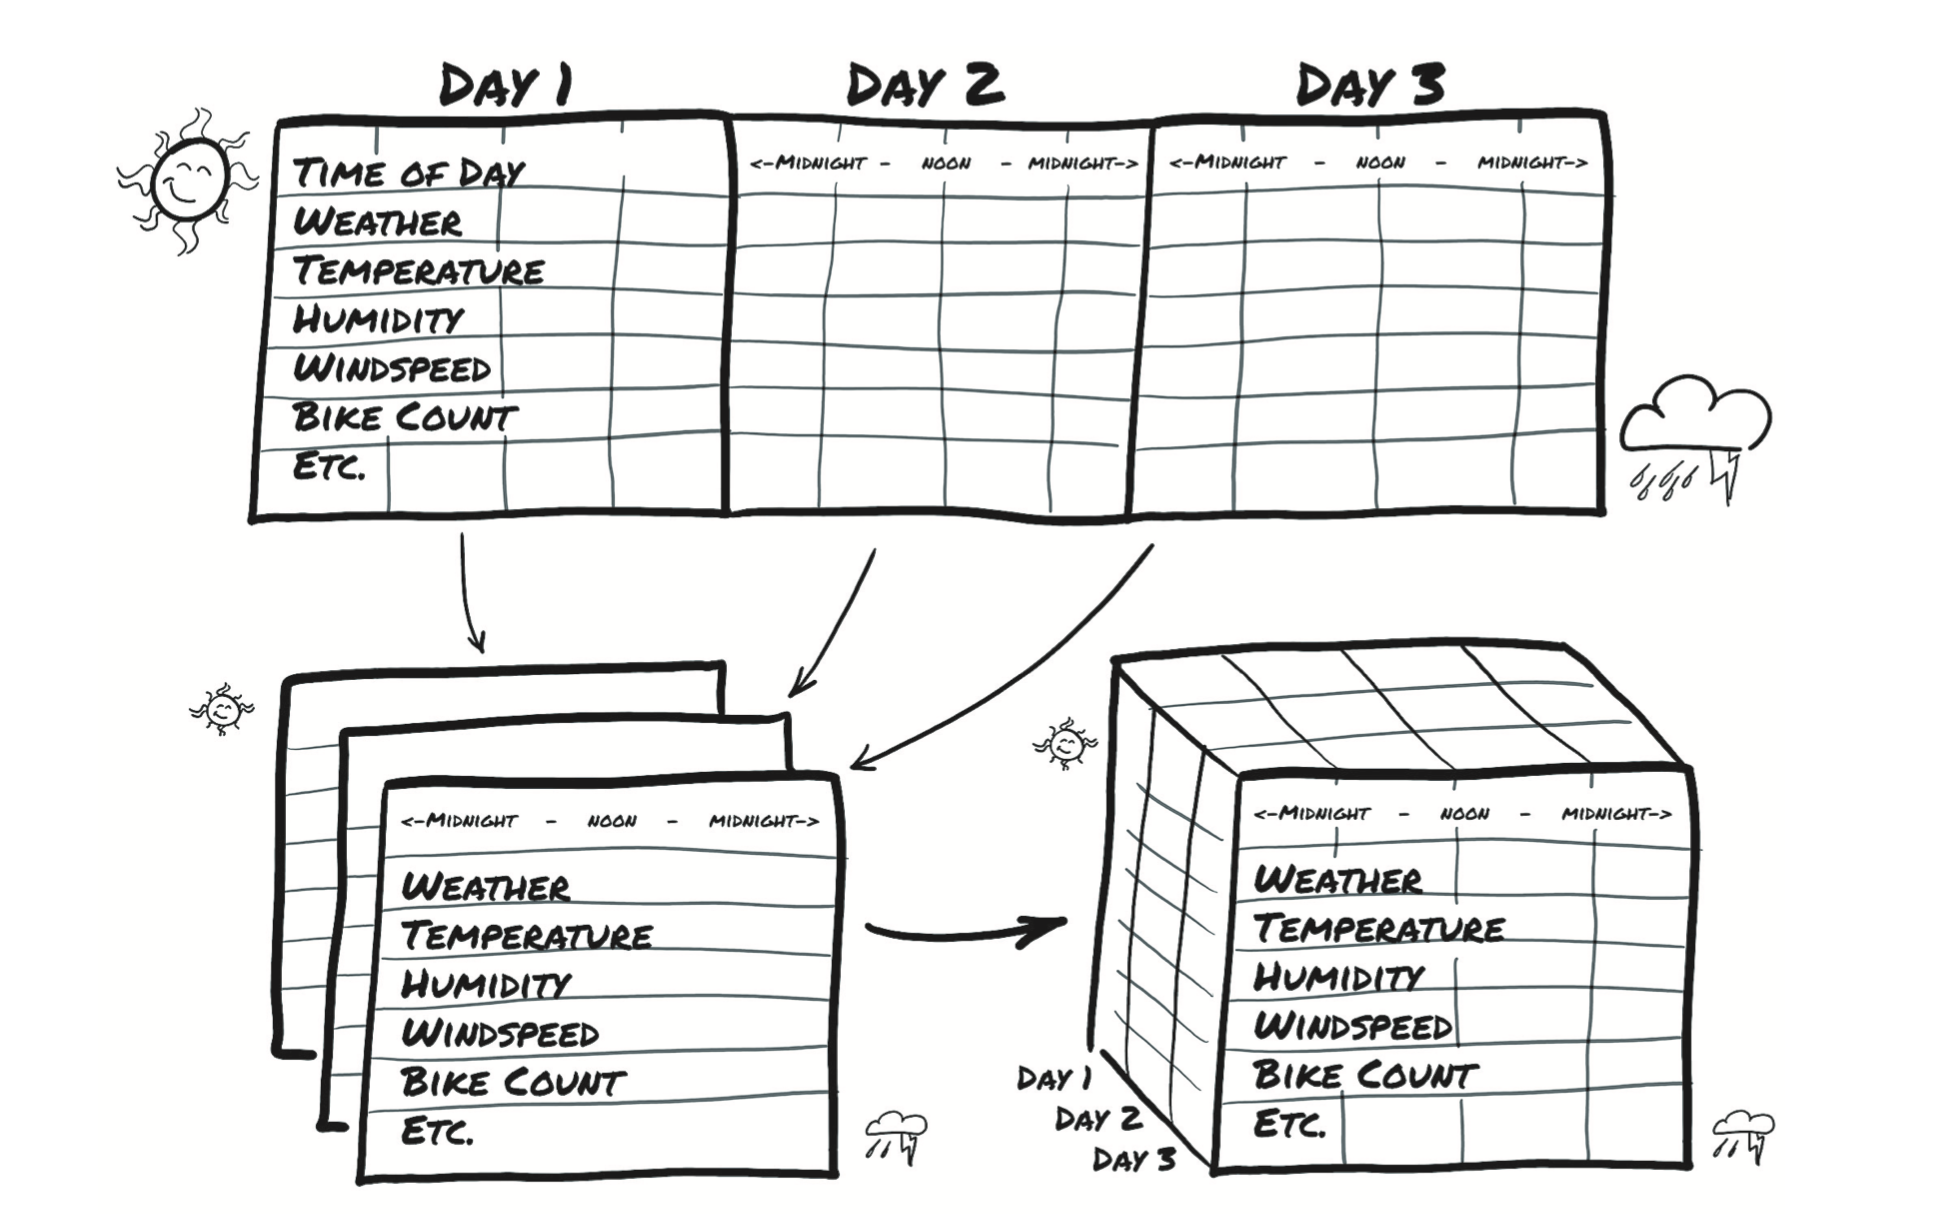
在源数据中，每一行是单独一个小时的数据（图3.2显示该数据的转置版本以更好地适合打印页面。）我们想改变行-小时的组织方式，这样你就可以使一个轴以天的速度增加，而另一个轴代表一天中的小时（与日期无关）。第三个轴每一列数据不同（天气，温度等）。

加载数据，如以下代码：

In [68]:
import numpy as np
import torch
bikes_numpy = np.loadtxt("./data/chapter3/hour-fixed.csv",
                         dtype=np.float32,
                         delimiter=",",
                         skiprows=1,
                         converters={1: lambda x: float(x[8:10])})
bikes = torch.from_numpy(bikes_numpy) 
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In [69]:
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [70]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
# 这里-1的意思是自动，然后24是指24小时，bikes.shape[1]是原来bikes张量中的列数
# 这样就成功地把二维张量转化为三维的张量
daily_bikes, daily_bikes.shape, daily_bikes.stride()

(tensor([[[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00,
           1.3000e+01, 1.6000e+01],
          [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00,
           3.2000e+01, 4.0000e+01],
          [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00,
           2.7000e+01, 3.2000e+01],
          ...,
          [2.2000e+01, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00,
           3.1000e+01, 3.4000e+01],
          [2.3000e+01, 1.0000e+00, 1.0000e+00,  ..., 1.1000e+01,
           1.7000e+01, 2.8000e+01],
          [2.4000e+01, 1.0000e+00, 1.0000e+00,  ..., 1.5000e+01,
           2.4000e+01, 3.9000e+01]],
 
         [[2.5000e+01, 2.0000e+00, 1.0000e+00,  ..., 4.0000e+00,
           1.3000e+01, 1.7000e+01],
          [2.6000e+01, 2.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           1.6000e+01, 1.7000e+01],
          [2.7000e+01, 2.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
           8.0000e+00, 9.0000e+00],
          ...,
          [4.5000e+01, 2.0000e+00, 1.0000e+00,  ..., 1.100

这里发生了什么？首先，`bikes.shape [1]`为`17`，它是自行车（`bikes`）张量中的列数。 但是代码的真正难点在于调用视图（view），这一点很重要：它改变了查看相同数据张量的方式。

在张量上调用视图方法（`view`）返回一个新的张量，该张量可以更改维数和步幅信息，而无需更改存储。结果，你可以以零成本重新布置张量因为根本没有数据被复制。你的视图（`view`）调用要求你为返回的张量提供新的形状。将-1用作占位符是为了“但是考虑到其他维度和元素的原始数量，还剩下很多索引”。

记住在这种情况下，存储（`Storage`）是连续的数字的线性容器——浮点数。你的自行车（`bikes`）张量在相应的存储中逐行存储，这一点已通过早期对bikes.stride()的调用输出确认。

对于`daily_bikes`，步幅告诉你沿小时维度（第二个）前进1个位置需要你将存储（或一组列）中的位置前进17个位置，而沿日期维度（第一个）前进则需要你在时间24小时中前进等于行长度的元素数（此处为`408`，即`17 * 24`）。

最右边的维度是原始数据集中的列数。在中间维度中，你将时间分为`24`个连续小时的块。换句话说，你现在每天有`C`个通道的`N`个`L`小时的序列。为了获得你所需的`NxCxL`顺序，你需要转置张量：

In [71]:
daily_bikes = daily_bikes.transpose(1, 2) 
# 这里是将第二个维度（1）和第三个维度（2）转置
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

前面我们提到天气状况变量是有序数。实际上，它有4个等级：1表示最佳天气，而4表示最坏的天气。你可以将此变量视为分类变量，其级别解释为标签或者连续标签。如果你选择分类，则将变量转换为独热编码（one-hot）的向量，并将列与数据集连接起来。为了使你的数据渲染更容易，现在暂时限制为第一天。首先，初始化一个零填充矩阵，其行数等于一天中的小时数，列数等于天气等级的数:

In [72]:
first_day = bikes[:24].long()  # bikes 的前24列代表第一天的14小时
weather_onehot = torch.zeros(first_day.shape[0], 4) 
first_day[:,9], weather_onehot, first_day.shape

(tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.Size([24, 17]))

In [73]:
first_day[:, 9], first_day[:, 9].unsqueeze(1), first_day[:, 9].unsqueeze(1) - 1
# first_day[:, 9]: 获取第一天的24小时的天气情况
# first_day[:, 9]: 将获取的第一天的天气情况的一维数组变成

(tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2]),
 tensor([[1],
         [1],
         [1],
         [1],
         [1],
         [2],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [2],
         [2],
         [2],
         [2],
         [2],
         [3],
         [3],
         [2],
         [2],
         [2],
         [2]]),
 tensor([[0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [1],
         [2],
         [2],
         [1],
         [1],
         [1],
         [1]]))

In [74]:
weather_onehot.scatter_(dim=1, index=first_day[:,9].unsqueeze(1) - 1, value = 1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

这一天从1级天气开始到2级天气结束，所以这似乎是正确的。

最后，使用cat函数将矩阵连接到原始数据集。看你的第一个结果：

In [76]:
torch.cat((bikes[:24], weather_onehot), 1)

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 6.0000e+00, 0.0000e+00, 1.0000e+00, 2.4000e-01, 2.8790e-01,
         8.1000e-01, 0.0000e+00, 3.0000e+00, 1.3000e+01, 1.6000e+01, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
         0.0000e+00, 6.0000e+00, 0.0000e+00, 1.0000e+00, 2.2000e-01, 2.7270e-01,
         8.0000e-01, 0.0000e+00, 8.0000e+00, 3.2000e+01, 4.0000e+01, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
         0.0000e+00, 6.0000e+00, 0.0000e+00, 1.0000e+00, 2.2000e-01, 2.7270e-01,
         8.0000e-01, 0.0000e+00, 5.0000e+00, 2.7000e+01, 3.2000e+01, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
         0.0000e+00, 6.0000e+00, 0.0000e+00, 1.0000e

在这里，你指定了原始自行车（bikes）数据集和独热编码的天气情况矩阵，这些矩阵将沿列维（例如1）连接在一起。换句话说，将两个数据集的列堆叠在一起，或者将新的独热编码列追加到原始数据集。为了使cat成功，张量必须与其他维度（行维度在这种情况也想通）有相同的大小。

请注意，你最后的新四列分别是1,0,0,0——这正是你所期望的天气等级1。

你也可以使用重新排列的daily_bikes张量完成相同的操作。请记住，它的形状为（B,C,L），其中L=24。首先创建零张量，有相同的B和L，但增加的列数与C：

In [79]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
daily_bikes.shape[2]) 
daily_weather_onehot.shape # 创建一个全部是0，形状如下的张量

torch.Size([730, 4, 24])

然后将独热编码散布到C维中的张量中。由于操作是在原地执行的，因此仅张量的内容会更改：

In [81]:
daily_weather_onehot.scatter_(1, daily_bikes[:,9,:].long().unsqueeze(1) - 1,
                                                            1.0) 
daily_weather_onehot.shape, daily_weather_onehot

(torch.Size([730, 4, 24]),
 tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 1., 1., 1.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0.,

沿C维度连接：

In [84]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)
daily_bikes

tensor([[[1.0000e+00, 2.0000e+00, 3.0000e+00,  ..., 2.2000e+01,
          2.3000e+01, 2.4000e+01],
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          1.0000e+00, 1.0000e+00],
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          1.0000e+00, 1.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00,
          1.0000e+00, 1.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[2.5000e+01, 2.6000e+01, 2.7000e+01,  ..., 4.5000e+01,
          4.6000e+01, 4.7000e+01],
         [2.0000e+00, 2.0000e+00, 2.0000e+00,  ..., 2.0000e+00,
          2.0000e+00, 2.0000e+00],
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          1.0000e+00, 1.0000e+00],
         ...,
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00,
          0.000

## 3.3 文本数据

深度学习席卷了自然语言处理（natural language processing, NLP）领域，尤其是通过使用不断消耗输入和模型先前输出相结合的模型。这种模型称为递归神经网络（recurrent neural networks, RNN），它已被成功应用于文本分类、文本生成和自动翻译系统。在这之前的NLP工作的特点是复杂的多阶段处理流程，包括编码语言语法的规则。

> - Nadkarni et al., “Natural language processing: an introduction”. JAMIA
   https://www.ncbi.nlm.nih.gov/pmc/arti-cles/PMC3168328
> - Wikipedia entry for natural language processing:
   https://en.wikipedia.org/wiki/Natural-language_processing
   
目前，最先进的（state-of-the-art）工作在大型语料库上端到端地从头开始训练网络，让这些规则从数据中浮现出来。在过去的几年中，互联网上最常用的自动翻译系统服务就是基于深度学习的。

在本章中，你的目标是将文本转换成神经网络可以处理的东西，就像前面的例子一样，即数值张量。在处理成数值张量之后，再为你的文本处理工作选择正确的网络结构，然后就可以使用PyTorch进行NLP了。你马上就会看到此功能的强大之处：如果你以正确的形式提出了问题，就可以使用相同的PyTorch工具在不同领域中的任务上达到目前最先进的性能。这项工作的第一部分是重塑数据。

网络在两个级别上对文本进行操作：在字符级别上，一次处理一个字符；而在单词级别上，单词是网络中最细粒度的实体。无论是在字符级别还是在单词级别操作，将文本信息编码为张量形式的技术都是相同的。这种技术没什么神奇的，你之前已经用过了，即独热编码。

我们从字符级示例开始。首先，获取一些文本进行处理。Gutenberg项目是一个很棒的资源，它是一项志愿性的工作，它对文化作品进行数字化并存档，并使其以开放格式（包括纯文本文件）免费提供。如果你的目标是大型语料库，那么维基百科语料库就非常出色：它是维基百科文章的完整集合，其中包含19亿个单词和超过440万条文章。你可以在英语语料库网站上找到其他几种语料库。

从Gutenberg项目网站上加载Jane Austen的《傲慢与偏见》（点击下载）。保存文件并读入文件，如下所示。

In [85]:
with open('./data/chapter3/1342-0.txt', encoding='utf8') as f:
    text = f.read()

在继续之前，你需要先注意一个细节：编码（encoding）。编码是一个宽泛的词，因此我们现在要做的就是实际“触摸”它。每个字符都由一个代码表示，该代码是一系列适当长度的比特（bit）位，它可以唯一地标识每个字符。最简单的这种编码是ASCII（American Standard Code for Information Interchange），其历史可以追溯到1960年代。ASCII使用128个整数对128个字符进行编码。例如，字母“a”对应于二进制1100001或十进制97；字母“b”对应于二进制1100010或十进制98，依此类推。该编码刚好8位，这在1965年是一个很大的收获。

> 注意：显然，128个字符不足以正确表示除英语之外的其他书面文字所需的所有字形、字音、连字等等。为此，其他编码被开发了出来，用更多的比特位代码表示更大范围的字符。更大范围的字符被标准化为Unicode编码，它将所有已知字符映射为数字，这些数字的位表示由特定编码提供。流行的编码包括UTF-8、UTF-16和UTF-32，对应数字分别是8位、16位或32位整数的序列。 Python 3.x中的字符串是Unicode字符串。

你将对字符进行独热编码，以将独热编码限制为对要分析的文本有用的字符集。在本例中，因为你以英文加载了文本，所以使用ASCII这种小型编码是非常安全的。你也可以将所有字符都转换为小写，以减少编码中的字符数。同样，你还可以筛选出与预期的文本类型无关的标点符号、数字和其他字符，这可能会也可能不会对你的神经网络产生实际的影响，具体取决于手头的任务。

此时，你需要解析文本中的字符，并为每个字符进行独热编码。 每个字符将由一个长度等于编码中字符数的向量表示。该向量除了有一个元素是1外其他全为0，这个1的索引对应该字符在字符集中的位置。

首先，将文本分成若干行，然后选择任意一行：

In [110]:
lines = text.split('\n')
line = lines[40]
line, lines[41]

('It is a truth universally acknowledged, that a single man in possession',
 'of a good fortune, must be in want of a wife.')

In [111]:
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [112]:
letter_tensor = torch.zeros(len(line), 128) # 128是由于ASCII的限制
letter_tensor.shape

torch.Size([70, 128])

请注意，`letter_tensor`每行将要表示一个独热编码字符。现在在每一行正确位置上设置成1，以使每一行代表正确的字符。设置1的索引对应于编码中字符的索引：

In [117]:
print(line.lower().strip())
for i, letter in enumerate(line.lower().strip()):
    # 文本里含有双引号，不是有效的ASCII，因此在此处将其屏蔽
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_tensor[i][letter_index] = 1

“impossible, mr. bennet, impossible, when i am not acquainted with him


你已经将句子独热编码成神经网络可以使用的表示形式。你也可以沿张量的行，通过建立词汇表来在词级别（word-level）对句子（即词序列）进行独热编码。由于词汇表包含许多单词，因此该方法会产生可能不是很实际的很宽的编码向量。在本章的后面，你将看到一种更有效的方式，通过使用嵌入（embedding）来在单词级别表示文本。现在，坚持独热编码，看看会发生什么。

定义clean_words函数，它接受文本并将其返回小写并删除标点符号。在“Impossible, Mr. Bennet”行上调用它时，会得到以下信息：

In [119]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list
words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

接下来，在编码中建立单词到索引的映射：

In [120]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}
len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

请注意，word2index_dict现在是一个字典，其中单词作为键，而整数作为值。独热编码时，你将使用此词典来有效地找到单词的索引。

现在专注于句子，将其分解为单词并对其进行独热编码（即对每个单词使用一个独热编码向量来填充张量）。先创建一个空向量，然后赋值成句子中的单词的独热编码：

In [122]:
word_tensor = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_tensor[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))

print(word_tensor.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


此时，`word_tensor`表示长度为11编码长度为7261（这是字典中单词的数量）的一个句子。

## 3.3.1 文本嵌入

独热编码是一种将类别数据表示成张量的很有用技术。就像你可能预料到的那样，当需要编码的项目数很大（例如语料库中的单词）时，独热编码就开始崩溃了。一本书中有超过7000个单词！

当然，你可以做一些工作来对单词进行去重、压缩替代拼写、将过去和将来时统一为相同表示，等等。尽管如此，通用的英文编码仍将是巨大的。更糟糕的是，每次遇到一个新单词时，都必须在向量中添加一个新列，这意味着要在模型中添加一组新的权重以解决该新词汇输入问题，从训练角度看这将给你带来很大的痛苦。

如何将编码压缩为更易于管理的大小，并限制大小增长？好吧，可以使用浮点数向量，而不是使用多个0和一个1的向量。举例来说，一个含100个浮点数的向量就可以表示很大量的词汇。关键是找到一种有效的方法，以一种有助于下游学习的方式将单个单词映射到这个100维空间。这种技术称为嵌入（embedding）。

原则上，你可以遍历词汇表并为每个单词生成100个随机浮点数。 这种方法可能是有效的，因为你可以将大量词汇塞入100个数字中，但是它会丢弃掉基于语义或上下文的单词之间的任何距离信息。使用这种词嵌入的模型不得不处理其输入向量中的少量结构。理想的解决方案是以这样的方式生成嵌入：用于同一上下文的单词映射到嵌入空间的邻近区域。

如果要手工设计解决此问题的方法，你有可能决定通过沿轴映射基本名词和形容词来构建嵌入空间。你可以生成一个二维空间，在该空间中，两个坐标轴分别映射到名词“水果”（0.0-0.33）、“花”（0.33-0.66）和“狗”（0.66-1.0），以及形容词“红色”（0.0-0.2）、“橙色”（0.2-0.4）、“黄色”（0.4-0.6）、“白色”（0.6-0.8）和“棕色”（0.8-1.0）。你现在的目标是将水果、花和狗放置在嵌入中。

开始嵌入单词时，可以将“苹果”映射到“水果”和“红色”象限中的某个数。同样，你可以轻松地映射“橘子”、“柠檬”、“荔枝”和“猕猴桃”（五颜六色的水果）。然后，你可以从花开始，分配“玫瑰”、“罂粟”、“水仙花”、“百合”和...好吧，不存在很多棕色的花。好，“太阳花”可以推出“花”、“黄色”和“棕色”，而“雏菊”可以推出“花”、“白色”和“黄色”。也许你应该更新“猕猴桃”以将其映射到“水果”、“棕色”和“绿色”附近。对于狗和颜色，“redbone（译者注：狗的品种）”、“fox”可能是“橙色”、“金毛”和“贵宾犬”可是“白色”的，以及...大多数种类的狗都是“棕色”的。

尽管对于大型语料库而言，手动进行此映射并不可行，但你应注意，尽管嵌入大小仅为2，但你描述了除基数8个之外的15个不同的单词，如果你花一些创造性的时间，可能还会嵌入更多的单词。

你可能已经猜到了，这种工作是可以自动进行的。通过处理大量文本语料库，你可以生成与此类似的嵌入。主要区别在于嵌入向量具有100到1000个元素，并且坐标轴不直接映射到某个词义，但是意思相近的词映射到嵌入空间也是相近的，其轴可能是任意的浮点维（floating-point dimensions）。

尽管实际使用的算法（比如word2vec）对于我们在此要关注的内容来说有点超出范围，但值得一提的是，嵌入通常是使用神经网络并试图根据句中邻近词（上下文）预测某个词而生成的。在这种情况下，你可以从独热编码的单词开始，使用（通常是相当浅的）神经网络来生成嵌入。当嵌入可用时，你就可以将其用于下游任务。

生成的嵌入的一个有趣的方面是，相似的词不仅会聚在一起，还会与其他词保持一致的空间关系。如果你要使用“苹果”的嵌入向量，并加上和减去其他词的嵌入向量，就可以进行类比，例如苹果 - 红色 - 甜 + 酸，最后可能得到一个类似“柠檬”的向量。

我们不会在这里使用文本嵌入，但是当必须用数字向量表示集合中的大量元素时，它们是必不可少的工具。

## 3.4 图像数据

卷积神经网络的出现彻底改变了计算机视觉，基于图像的系统从此获得了一系列新的能力。通过使用成对的输入和期望的输出样本来训练端到端网络，可以前所未有地解决需要高度优化算法块构建的复杂模型。为了参与到这场革命中，你需要能够从常见的图像格式中载入图像，然后将数据转换为张量表示，该张量以PyTorch所期望的方式排列图像的各个部分。

图像表示为按规则网格排列的标量集合，并且具有高度和宽度（以像素为单位）。每个网格点（像素）可能只有一个标量，这种图像表示为灰度图像；或者每个网格点可能有多个标量，它们通常代表不同的颜色或不同的特征（features），例如从深度相机获得的深度。

代表单个像素值的标量通常使用8位整数编码，例如在消费类相机中。在医学、科学和工业应用中，你经常会发现具有较高数字精度的像素，例如12位和16位。如果像素对有关物理特性的信息例如骨密度、温度或深度进行编码，则此高精度可提供更大的（表示）范围或更高的灵敏度。

你有几种用数字编码颜色的方法。最常见的是RGB，它定义用三个数字表示颜色，这三个数字分别代表红色、绿色和蓝色的强度。你可以将一个颜色通道视为仅讨论该颜色时的灰度强度图，例如你通过一副纯红色太阳镜观察场景时所看到的情况。图3.3显示了一条彩虹，其中的每个RGB通道都捕获了光谱的特定部分。（该图被简化了，省略了一些东西。例如，橙色和黄色带表示为红色和绿色的组合。）

图像有好几种文件格式，但是幸运的是，你有很多方法可以在Python中加载图像。首先使用imageio模块加载PNG图像。在本章中，你将使用imageio方法，因为它通过统一的API处理不同的数据类型。现在加载图像，如以下所示。

In [128]:
import imageio
img_arr = imageio.imread('./data/chapter3/bobby.jpg') 
img_arr.shape

(720, 1280, 3)

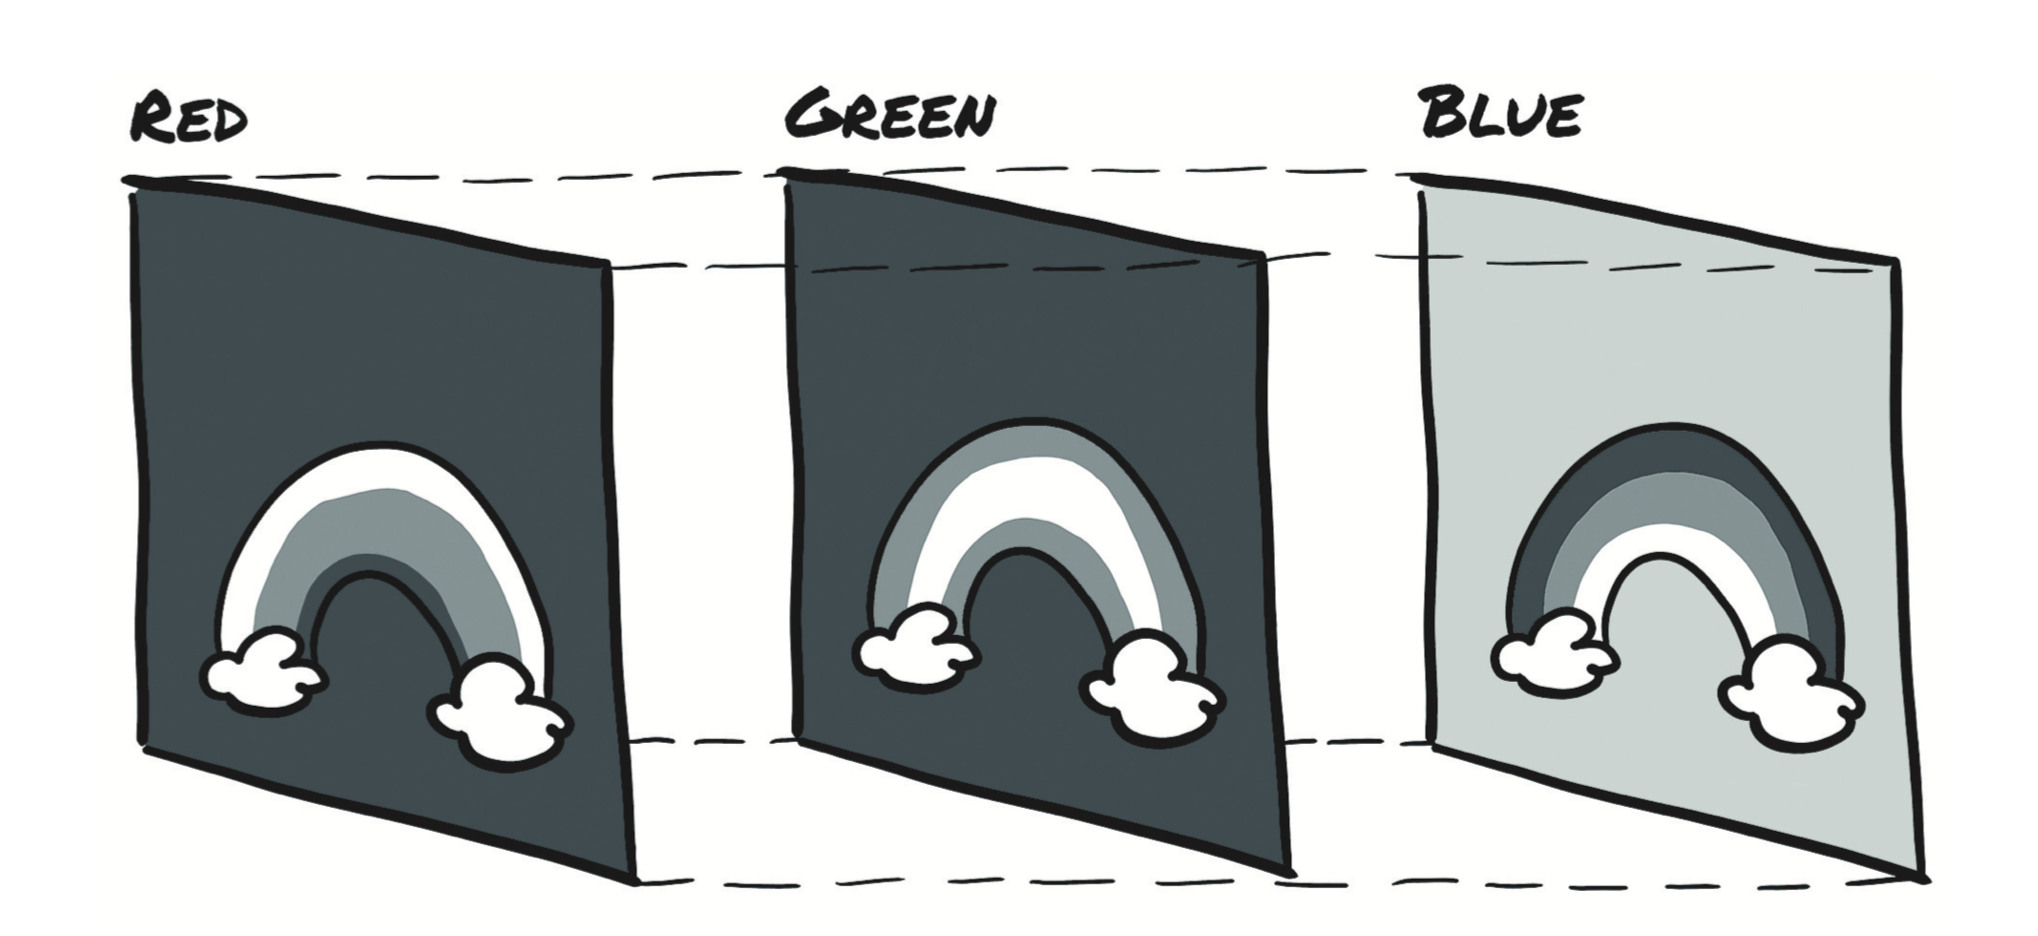
此例中，`img_arr`是一个NumPy数组对象，它有三个维度：两个空间维度（宽度和高度），以及对应于红色、绿色和蓝色的第三个维度。任何输出NumPy数组的库都这样做以获得PyTorch张量。唯一需要注意的是维度的设置，PyTorch模块处理图像数据需要将张量设置为`C x H x W`（分别为通道、高度和宽度）。

你可以使用转置（`transpose`）函数获得正确的维度设置。给定`W x H x C`的输入张量，你可以通过交换第一个和最后一个通道来获得正确的维度设置：

In [129]:
img = torch.from_numpy(img_arr) 
out = torch.transpose(img, 0, 2)

你之前已经看过此示例，但是请注意此操作不会复制张量数据。相反，out使用与img相同的内部存储，只是修改了张量的尺寸和步幅信息。这种安排很方便，因为操作的代价很少，但是（当心）更改img中的像素值会导致out变化。

还要注意其他深度学习框架使用不同的维度设置。最初，TensorFlow将通道尺寸保持在最后，从而形成`H x W x C`布局。（现在，它已经支持多种布局。）从底层性能角度来看此策略具有优缺点，但只要适当地重塑（reshape）你的张量它就不会对你有所影响。

到目前为止，你已经描述了一张图片。遵循与以前的数据类型相同的策略，创建包含多个图像的数据集以用作神经网络的输入，然后沿着第一维将这些图像按照批量存储，以获得`N x C x H x W`张量。

一个高效的选择就是使用堆叠（`stack`）来构建这个张量，你可以预先分配适当尺寸的张量，并用从文件夹中加载图像填充它，

In [132]:
batch_size = 100
batch = torch.zeros(100, 3, 256, 256, dtype=torch.uint8)

这表示你的批次将包含100个RGB图像，分别为256像素高度和256像素宽度。注意张量的类型：你期望每种颜色都以8位整数表示，就像大多数标准消费相机照出的相片格式一样。现在你可以从输入的文件夹中加载所有的png图像并将其存储在张量中：

In [134]:
import os
data_dir = './data/chapter3/image-cats/'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name) == '.png']
for i, filename in enumerate(filenames):
  img_arr = imageio.imread(filename)
  batch[i] = torch.transpose(torch.from_numpy(img_arr), 0, 2)

如前所述，神经网络通常使用浮点张量作为输入。正如你将在接下来的章节中看到的那样，当输入数据的范围大约为0到1或–1到1时，神经网络表现出最佳的训练性能（影响来自于其如何构造模块的定义。）

你一贯要做的事情是将张量转换为浮点数并归一化像素值。强制转换为浮点数很容易，但是归一化比较麻烦，因为它取决于你决定的输入的哪个范围应该落在0到1（或–1到1）之间。一种可能的选择是将像素的值除以255（8位无符号最大可表示的数字）：

In [136]:
batch = batch.float()
batch /= 255.0

## 3.5 体积数据

你已经学习了如何加载和表示2D图像，比如使用相机拍摄的图像。在诸如涉及CT（Computed Tomography）扫描等医学成像应用程序的情况下，通常需要处理从头到脚方向堆叠的图像序列，每个序列对应于整个身体的横截面。在CT扫描中，强度代表身体不同部位的密度：肺、脂肪、水、肌肉、骨骼，以密度递增的顺序排列，当在临床工作站上显示CT扫描时，会从暗到亮映射。根据穿过人体后到达检测器的X射线量计算每个点的密度，并使用一些复杂的数学运算将原始传感器数据反卷积（deconvolve）为完整体积数据。

CT具有单个的强度通道，这类似于灰度图像。通常在本地数据格式中，通道维度被忽略了，因此原始数据通常会具有三个维度。通过将单个2D切片堆叠到3D张量中，你可以构建表示对象的3D解剖结构的体积数据。与图3.3不同，图3.4中的额外的维表示物理空间中的偏移量，而不是可见光谱的特定频带。

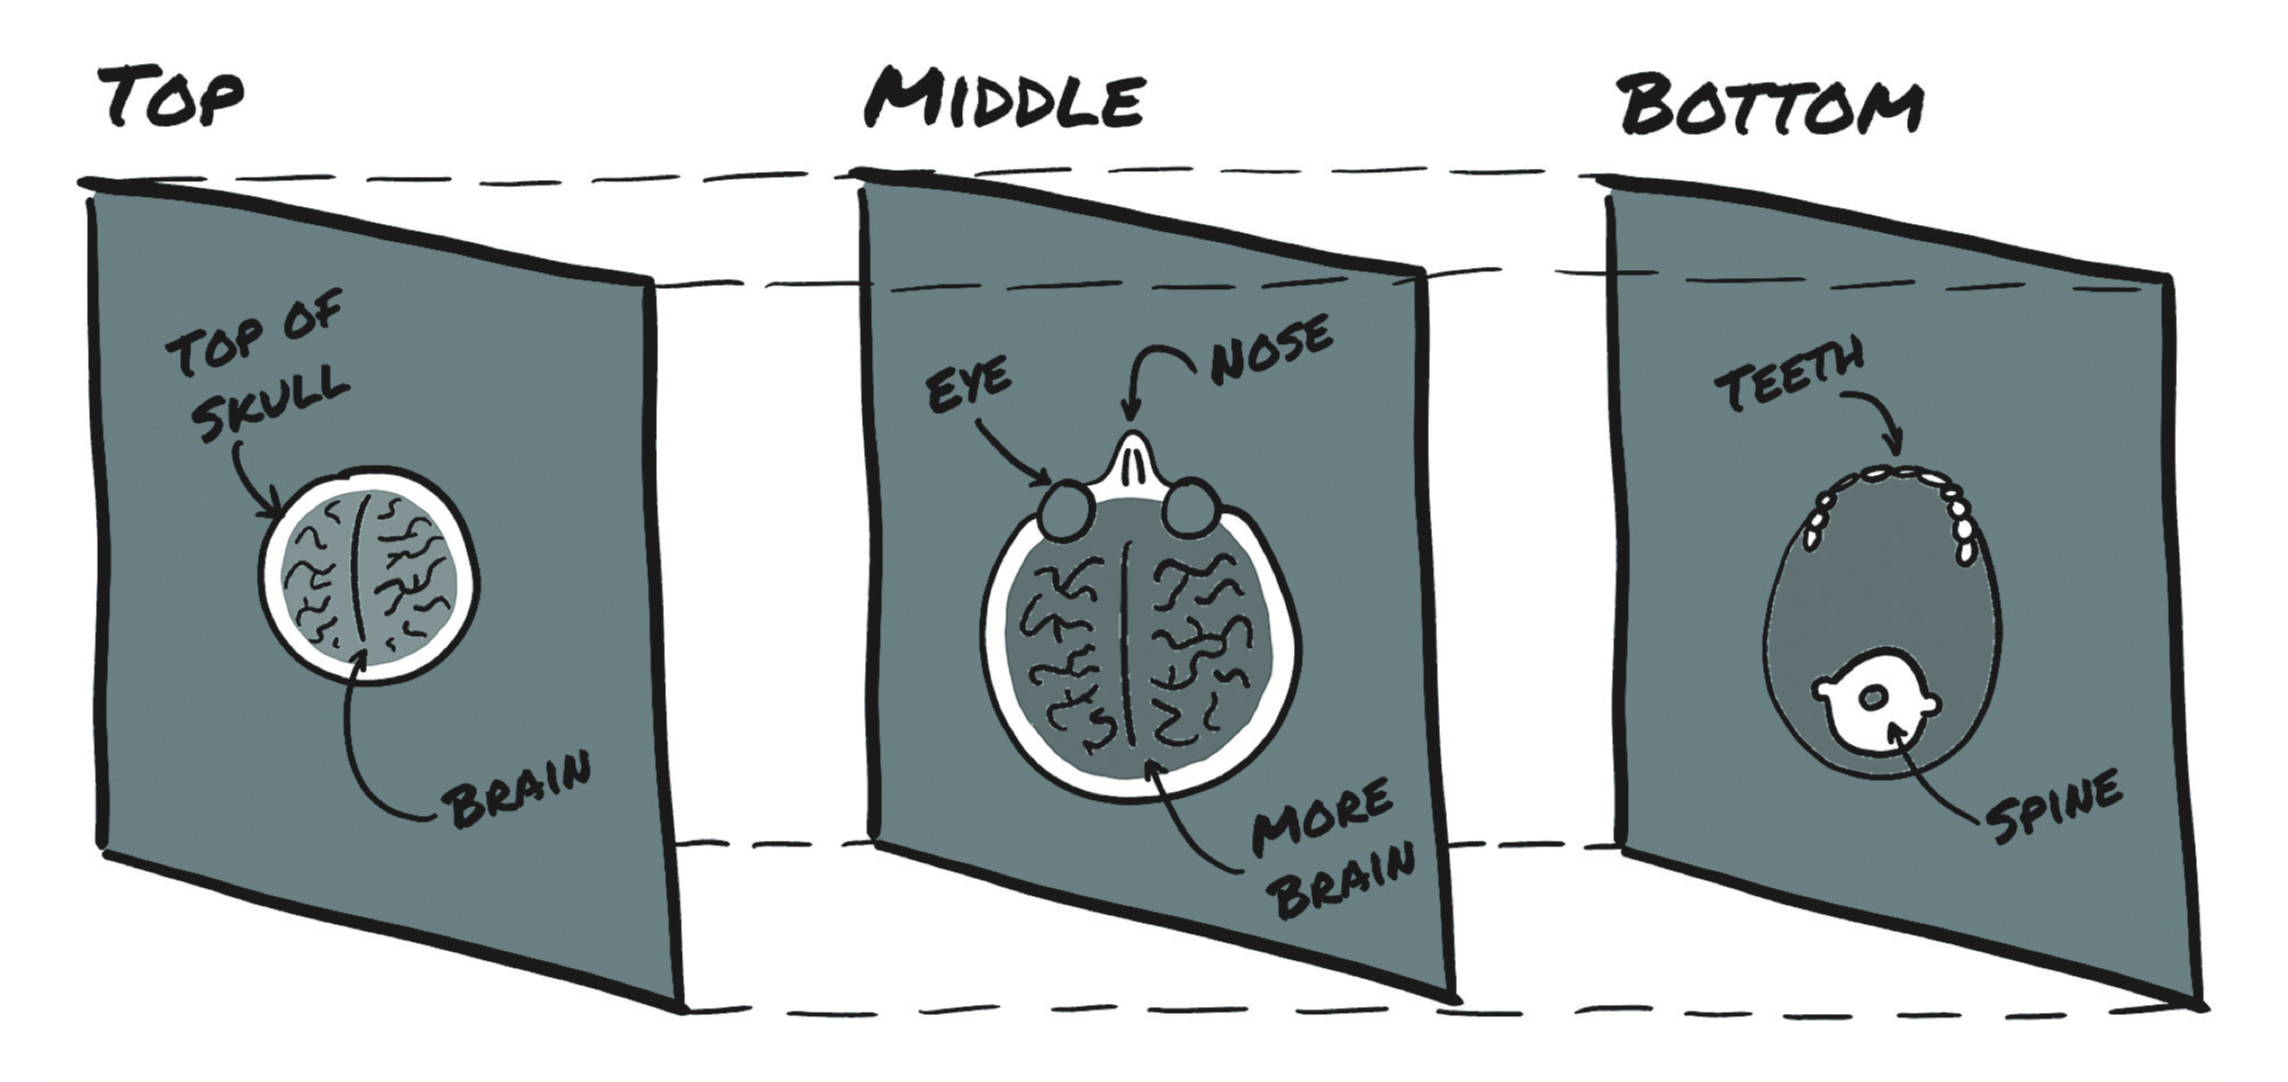
图3.4 从头顶到颌骨的CT扫描切片

我们并不会在此处详细介绍医学成像数据格式。现在，足以说存储体积数据的张量和存储图像数据的张量之间不存在根本差异。在通道（channel）维之后，你有一个额外的维——深度（depth），形成5D张量为N x C x D x H x W。

使用imageio模块中的volread函数加载一个CT扫描样本，该函数以文件夹作为参数，将所有DICOM（Digital Imaging Communication and Storage，数字图像通信和存储）系列文件组合成一个NumPy 3D数组中，如下所示。

In [138]:
import imageio
dir_path = "./data/chapter3/volumetric-dicom/2-LUNG 3.0  B70f-04083" 
vol_arr = imageio.volread(dir_path, 'DICOM') 
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


(99, 512, 512)

同样，由于缺少通道信息，此时的维度设置与PyTorch所期望的不同。你必须通过unsqueeze为新增通道（channel）维：

In [139]:
vol = torch.from_numpy(vol_arr).float() 
vol = torch.transpose(vol, 0, 2) 
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 512, 512, 99])